In [1]:
#import ultralytics
#ultralytics.checks()
#from ultralytics import YOLO

#import dayolo
#from dayolo import YOLO

import yolo
from yolo import YOLO

from PIL import Image
import torch
import yaml

import os
import random
#from ultralytics.utils.plotting import plot_labels
import pandas as pd
import sys

module_path = os.path.abspath(os.path.join('..'))
print(module_path)
module_path = module_path+'/data_preprocessing'
print(module_path)

if module_path not in sys.path:
    sys.path.append(module_path)

#import visualization_utils as visutils

/vast/palmer/home.grace/eec42/BirdDetector/src
/vast/palmer/home.grace/eec42/BirdDetector/src/data_preprocessing


In [2]:
device = "0" if torch.cuda.is_available() else "cpu"
if device == "0":
    torch.cuda.set_device(0) # Set to your desired GPU number

print(device)

0


In [3]:
# Create a new YOLO model from scratch
#model = YOLO('yolov8n.yaml')

# Load a pretrained YOLO model (recommended for training) - for now, we keep the small version
#pretrained_model_name = 'pfeifer_penguins_poland_10percentbckgd_yolov8m_120epoch'
#model_path = 'runs/detect/' + pretrained_model_name + '/weights/best.pt'
#model = YOLO('yolov8m.pt', task='da_detect')
#model = YOLO("yolov8.yaml").load("yolov8m.pt")
#model = YOLO('yolov8m.pt', task='da_detect')
#model = YOLO('yolov8m.pt', task='detect')
#model = YOLO("yolov8m.yaml", task='detect').load("yolov8m.pt")
model = YOLO("yolov8m.yaml", task='detect', subtask='instanceDC').load("yolov8m.pt")


#model.load_weights('yolov8m.pt')


#PRETRAINED_MODEL_NAME = 'pfeifer_penguins_poland_10percentbckgd_yolov8m_120epoch'
#PRETRAINED_MODEL_PATH = 'src/model/runs/detect/' + PRETRAINED_MODEL_NAME + '/weights/best.pt'

#MODEL_NAME = 'pfeifer_penguins_poland_palmyra_10percent_bckgd_yolov8m_120epochs'
#TASK = 'detect' # Choose between: 'deepcoral_detect' 'detect'
#model = YOLO('yolov8m.pt')

INITIALIZING INSTANCE DOMAIN CLASSIFIER MODEL

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  yolo.nn.modules.conv.Conv                    [3, 48, 3, 2]                 
  1                  -1  1     41664  yolo.nn.modules.conv.Conv                    [48, 96, 3, 2]                
  2                  -1  2    111360  yolo.nn.modules.block.C2f                    [96, 96, 2, True]             
  3                  -1  1    166272  yolo.nn.modules.conv.Conv                    [96, 192, 3, 2]               
  4                  -1  4    813312  yolo.nn.modules.block.C2f                    [192, 192, 4, True]           
  5                  -1  1    664320  yolo.nn.modules.conv.Conv                    [192, 384, 3, 2]              
  6                  -1  4   3248640  yolo.nn.modules.block.C2f                    [384, 384, 4, True]           
  7                  -1  1   1991808  yol

  9                  -1  1    831168  yolo.nn.modules.block.SPPF                   [576, 576, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  yolo.nn.modules.conv.Concat                  [1]                           
 12                  -1  2   1993728  yolo.nn.modules.block.C2f                    [960, 384, 2]                 
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  yolo.nn.modules.conv.Concat                  [1]                           
 15                  -1  2    517632  yolo.nn.modules.block.C2f                    [576, 192, 2]                 
 16                  -1  1    332160  yolo.nn.modules.conv.Conv                    [192, 192, 3, 2]              
 17            [-1, 12]  1         0  yolo.nn.modules.conv.Concat                  [1]  

In [4]:
print(model.task)
print(model.subtask)

detect
instanceDC


In [5]:
model.model.model
for i, a in enumerate(model.model.model):
    if i == 22:
        print("block", i)
        print(a)

block 22
Detect(
  (cv2): ModuleList(
    (0): Sequential(
      (0): Conv(
        (conv): Conv2d(192, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
    )
    (1): Sequential(
      (0): Conv(
        (conv): Conv2d(384, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=Fal

In [6]:
# TRAIN the model on our dataset (data.yml config file) 

model_name = 'TEST_features_loss'

results = model.train(
   data='data.yaml',
   #imgsz=480,  # we are trying with several img size so we do not precise the size -> will automatically resize all images to 640x640
   epochs=1,
   batch=8, #32,
   #cos_lr=True,
   #dropout=0.3,
   #optimizer='Adam',
   patience=10,
   device=0,
   verbose=True,
   val = False,
   #dc = [0.5, 0.5, 0.5],
   #lr0=0.001,
   #lrf=0.0001,
   degrees=90, fliplr=0.5, flipud=0.5, scale=0.5, # augmentation parameters
   name=model_name)

New https://pypi.org/project/ultralytics/8.1.14 available 😃 Update with 'pip install -U ultralytics'
New https://pypi.org/project/ultralytics/8.1.14 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.228 🚀 Python-3.11.6 torch-2.1.0+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32501MiB)
Ultralytics YOLOv8.0.228 🚀 Python-3.11.6 torch-2.1.0+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32501MiB)


engine/trainer: task=detect, mode=train, model=yolov8m.yaml, data=data.yaml, epochs=1, time=None, patience=10, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=TEST_features_loss23, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, source_name=global_birds_palmyra, val=False, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, optimize=False, int8=False,

train: Scanning /gpfs/gibbs/project/jetz/eec42/data/pe_palmyra_10percentbkgd/train/labels.cache... 1722 images, 182 backgrounds, 0 corrupt: 100%|██████████| 1904/1904 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /gpfs/gibbs/project/jetz/eec42/data/pe_palmyra_10percentbkgd/val/labels.cache... 248 images, 19 backgrounds, 0 corrupt: 100%|██████████| 267/267 [00:00<?, ?it/s]


Plotting labels to runs/detect/TEST_features_loss23/labels.jpg... 
Plotting labels to runs/detect/TEST_features_loss23/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
1 epochs...
1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss    da_loss  Instances       Size

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss    da_loss  Instances       Size


  0%|          | 0/238 [00:00<?, ?it/s]

before pooling torch.Size([8, 1, 5, 5])
torch.Size([8, 1, 1, 1])
torch.Size([8, 1])
after fc1 torch.Size([8, 2])
selected_features torch.Size([33600, 576, 10, 10])
before pooling torch.Size([33600, 1, 10, 10])
torch.Size([33600, 1, 1, 1])
torch.Size([33600, 1])
after fc1 torch.Size([33600, 2])
instances_domainpreds torch.Size([33600, 2])


  0%|          | 0/238 [00:01<?, ?it/s]


OutOfMemoryError: CUDA out of memory. Tried to allocate 7.21 GiB. GPU 0 has a total capacty of 31.74 GiB of which 6.28 GiB is free. Including non-PyTorch memory, this process has 25.46 GiB memory in use. Of the allocated memory 20.86 GiB is allocated by PyTorch, and 4.11 GiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [ ]:
import torch

# Assuming 'list_of_tensors' is your list of tensors and 'B' is your tensor containing 0 and 1 values
list_of_tensors = [torch.tensor([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]]),
                   torch.tensor([[13, 14, 15, 16], [17, 18, 19, 20], [21, 22, 23, 24]]),
                   torch.tensor([[25, 26, 27, 28], [29, 30, 31, 32], [33, 34, 35, 36]])]

B = torch.tensor([0, 1, 0])

# Get the size of the list of tensors
N = list_of_tensors[0].size(0)

output = []
for i in range(len(list_of_tensors)):
    print(list_of_tensors[i].size()[0])
    for j in range(list_of_tensors[i].size()[0]):
        print(B[i])
        output.append(B[i])

print(output)



3
tensor(0)
tensor(0)
tensor(0)
3
tensor(1)
tensor(1)
tensor(1)
3
tensor(0)
tensor(0)
tensor(0)
[tensor(0), tensor(0), tensor(0), tensor(1), tensor(1), tensor(1), tensor(0), tensor(0), tensor(0)]


In [ ]:
print(B)

NameError: name 'B' is not defined

In [ ]:
batch_idx = torch.Tensor([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 3., 3., 4., 5., 6., 7.])
annotations_mask = [False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False]

new_batch_idx = batch_idx[annotations_mask]
new_batch_idx


tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.])

In [ ]:
b = new_batch_idx.unique(return_inverse=True)
b[1]
print(a)

Detect(
  (cv2): ModuleList(
    (0): Sequential(
      (0): Conv(
        (conv): Conv2d(192, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
    )
    (1): Sequential(
      (0): Conv(
        (conv): Conv2d(384, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     

In [ ]:
pretrained_model_name = 'DAN_pe_palmyra_10percentbkgd_dcgain1.5'
model_path = '/home/eec42/BirdDetector/runs/detect/train5/weights/last.pt'
model = YOLO(model_path, task='detect', subtask='domainclassifier')

In [ ]:

selected_img = []
img_path = '/gpfs/gibbs/project/jetz/eec42/data/pe_palmyra_10percentbkgd/test/'
selected_img.extend(random.choices(os.listdir(img_path + '/images/'), k=40))

# Predict results for randomly selected images
results = model.predict(
        #model = 'runs/detect/pfeifer_yolov8n_70epoch_default_batch32_dropout0.3',
        source = [os.path.join(img_path + 'images/', img) for img in selected_img],
        conf = 0.1, 
        iou = 0.1,
        show = False,
        save = False
    )

features = torch.load('/home/eec42/BirdDetector/runs/detect/DAN_pe_palmyra_10percentbkgd_dcgain1.5/features.pt')

C,H,W = features[0].size()
feats = []

for i in range(len(features)):
    reshaped_tensor = features[0].reshape(C, -1)
    concatenated_tensor = torch.cat([reshaped_tensor[i] for i in range(C)], dim=0).cpu()

    feats.append(concatenated_tensor)

feats_target = torch.stack(feats)



0: 640x640 88 birds, 1: 640x640 (no detections), 2: 640x640 1 bird, 3: 640x640 (no detections), 4: 640x640 3 birds, 5: 640x640 (no detections), 6: 640x640 1 bird, 7: 640x640 15 birds, 8: 640x640 1 bird, 9: 640x640 50 birds, 10: 640x640 7 birds, 11: 640x640 2 birds, 12: 640x640 (no detections), 13: 640x640 1 bird, 14: 640x640 2 birds, 15: 640x640 11 birds, 16: 640x640 84 birds, 17: 640x640 84 birds, 18: 640x640 3 birds, 19: 640x640 12 birds, 20: 640x640 3 birds, 21: 640x640 2 birds, 22: 640x640 1 bird, 23: 640x640 1 bird, 24: 640x640 1 bird, 25: 640x640 (no detections), 26: 640x640 1 bird, 27: 640x640 2 birds, 28: 640x640 (no detections), 29: 640x640 1 bird, 30: 640x640 1 bird, 31: 640x640 2 birds, 32: 640x640 (no detections), 33: 640x640 8 birds, 34: 640x640 (no detections), 35: 640x640 1 bird, 36: 640x640 3 birds, 37: 640x640 3 birds, 38: 640x640 48 birds, 39: 640x640 1 bird, 464.5ms
0: 640x640 88 birds, 1: 640x640 (no detections), 2: 640x640 1 bird, 3: 640x640 (no detections), 4: 6

In [ ]:
import sklearn.decomposition

reduced_features = sklearn.decomposition.PCA(n_components=2, svd_solver='arpack').fit_transform(feats_target.cpu().numpy())
reduced_features
#reduced_features = sklearn.manifold.TSNE(n_components=2).fit_transform(features[0].cpu().numpy())

array([[ 3.1237e-05, -2.9863e-13],
       [ 3.1237e-05, -3.9286e-13],
       [ 3.1237e-05, -4.2712e-13],
       [ 3.1237e-05,   4.332e-13],
       [ 3.1237e-05,  2.0543e-13],
       [ 3.1237e-05,  -6.413e-14],
       [ 3.1237e-05, -3.6398e-13],
       [ 3.1237e-05,  4.4527e-14],
       [ 3.1237e-05,  8.0038e-14],
       [ 3.1237e-05, -2.5578e-13],
       [ 3.1237e-05,  4.0374e-13],
       [ 3.1237e-05, -2.9595e-13],
       [ 3.1237e-05,  1.3585e-13],
       [ 3.1237e-05, -1.0755e-13],
       [ 3.1237e-05,  2.9604e-13],
       [ 3.1237e-05,  7.6689e-14],
       [ 3.1237e-05,  4.1047e-13],
       [ 3.1237e-05,  2.2103e-13],
       [ 3.1237e-05,  -2.914e-13],
       [ 3.1237e-05, -1.5076e-13],
       [ 3.1237e-05,  4.5661e-13],
       [ 3.1237e-05, -3.2837e-13],
       [ 3.1237e-05, -2.6829e-13],
       [ 3.1237e-05,  4.8286e-13],
       [ 3.1237e-05,   1.916e-13],
       [ 3.1237e-05, -3.9893e-13],
       [ 3.1237e-05, -2.9514e-13],
       [ 3.1237e-05, -3.5915e-14],
       [ 3.1237e-05,

In [ ]:
import numpy as np
def scale_to_01_range(x):
    # compute the distribution range
    value_range = (np.max(x) - np.min(x))
 
    # move the distribution so that it starts from zero
    # by extracting the minimal value from all its values
    starts_from_zero = x - np.min(x)
 
    # make the distribution fit [0; 1] by dividing by its range
    return starts_from_zero / value_range

In [ ]:
tx = scale_to_01_range(reduced_features[:,0])
tx
ty = scale_to_01_range(reduced_features[:,1])
ty

array([     0.1412,     0.03765,           0,     0.94543,     0.69512,      0.3989,    0.069382,      0.5183,     0.55733,     0.18829,     0.91305,     0.14414,     0.61866,     0.35118,      0.7947,     0.55365,     0.92045,     0.71227,     0.14915,      0.3037,     0.97115,     0.10852,     0.17454,           1,
           0.67993,    0.030979,     0.14504,      0.4299,     0.93299,     0.38072,     0.48824,     0.58239,     0.39243,     0.42563,     0.83903,    0.060046,     0.83715,    0.032066,     0.86825,     0.38329], dtype=float32)

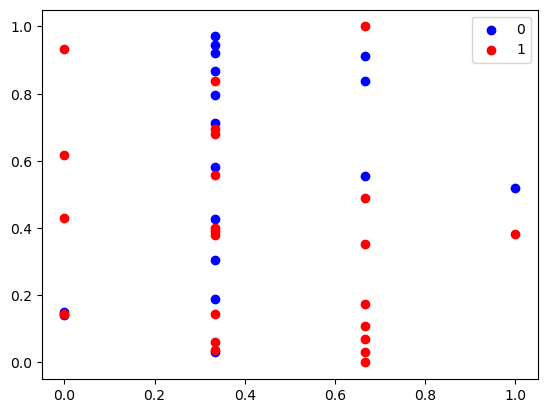

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
 
colors_per_class = {0:'blue', 1:'red'}

labels = []
for img in selected_img:
    labels.append(1 if os.path.basename(img).startswith('global_birds_palmyra') else 0)

# for every class, we'll add a scatter plot separately
for label in colors_per_class:
    # find the samples of the current class in the data
    indices = [i for i, l in enumerate(labels) if l == label]
 
    # extract the coordinates of the points of this class only
    current_tx = np.take(tx, indices)
    current_ty = np.take(ty, indices)
 
    # convert the class color to matplotlib format
    color = colors_per_class[label] #np.array(colors_per_class[label], dtype=np.float) / 255
 
    # add a scatter plot with the corresponding color and label
    ax.scatter(current_tx, current_ty, c=color, label=label)
 
# build a legend using the labels we set previously
ax.legend(loc='best')
 
# finally, show the plot
plt.show()

In [ ]:
import sklearn

#reduced_features = sklearn.decomposition.PCA(n_components=2).fit_transform(feats_source.cpu().numpy())
reduced_features = sklearn.manifold.TSNE(n_components=2).fit_transform(feats_source.cpu().numpy())
reduced_features


AttributeError: module 'sklearn' has no attribute 'manifold'

In [ ]:
len(reduced_features)

40

In [ ]:
model.model.model
for i, a in enumerate(model.model.model):
    if i == 23:
        print("block", i)
        print(a)

In [ ]:
model.subtask

'unsupervisedfeaturesdistance'

In [ ]:
print(B)

NameError: name 'B' is not defined

In [ ]:

module_path = os.path.abspath(os.path.join('..', '..'))
print(module_path)
module_path = module_path+'/runs'
print(module_path)

if module_path not in sys.path:
    sys.path.append(module_path)

In [ ]:
PRETRAINED_MODEL_PATH = module_path + '/detect/YOLO_pe_palmyra_10percentbkgd_test2/weights/best.pt'
model = YOLO('yolov8m.yaml', task='detect').load(PRETRAINED_MODEL_PATH)

In [ ]:
selected_img = []
img_path = '/gpfs/gibbs/project/jetz/eec42/data/pe_palmyra_10percentbkgd/test/'
for subdataset in ['global_birds_penguins', 'global_birds_palmyra']:
    selected_img.extend(random.choices(os.listdir(img_path + subdataset + '/images/'), k=10))

results = model.predict(
        #model = 'runs/detect/pfeifer_yolov8n_70epoch_default_batch32_dropout0.3',
        source = [os.path.join(img_path + 'images/', img) for img in selected_img],
        conf = 0.1, 
        iou = 0.1,
        show = False,
        save = False
    )

In [ ]:
results[5].boxes

## Visualization

In [ ]:
TASK = 'deepcoral_detect' #detect
#model_name = 'deepcoral_test4'
#model_path = 'runs/' + TASK + '/' + model_name + '/weights/best.pt'
#model = YOLO(model_path, TASK)
model_name = 'deepcoral_background_lscale16_epochs20_coralgain10'
PRETRAINED_MODEL_PATH = 'runs/' + TASK + '/' + model_name + '/weights/best.pt'

model = YOLO(PRETRAINED_MODEL_PATH, TASK)

In [ ]:
datasets = ['source', 'target'] #['global_birds_poland', 'global_birds_palmyra', 'global_birds_penguins', 'global_birds_pfeifer']
fname = "data.yaml"
stream = open(fname, 'r')
data = yaml.safe_load(stream)
img_path = data['path'] + '/test/'

In [ ]:
# FOR NORMAL MODEL
# Select randomly 10 images from the test dataset

if TASK == 'detect':
    selected_img = []
    for subdataset in datasets:
        selected_img.extend(random.choices(os.listdir(img_path + subdataset + '/images/'), k=6))

    results = model.predict(
            #model = 'runs/detect/pfeifer_yolov8n_70epoch_default_batch32_dropout0.3',
            source = [os.path.join(img_path + 'images/', img) for img in selected_img],
            conf = 0.2, 
            iou = 0.1,
            show=False,
            save=False
        )

In [ ]:
if TASK == 'detect':
    for img, result in zip(selected_img, results):

        detection_boxes = []
        save_path = '/vast/palmer/home.grace/eec42/BirdDetector/src/model/runs/detect/' + model_name + '/prediction_' + os.path.basename(result.path).split('.jpg')[0] + '.jpg'
        for detect in range(len(result.boxes.cls)):
            det = {}
            det['conf'] = result.boxes.conf[detect].cpu()
            det['category'] = result.boxes.cls[detect].cpu()
            coords = result.boxes.xywhn[detect].cpu()
            det['bbox'] = [coords[0]-coords[2]/2, coords[1]-coords[3]/2, coords[2], coords[3]]
            detection_boxes.append(det)
            
        im_path = os.path.join(img_path + 'images/', img)
        visutils.draw_bounding_boxes_on_file(im_path, save_path, detection_boxes,
                                        confidence_threshold=0.0, detector_label_map=None,
                                        thickness=1,expansion=0, colormap=['Red'])

        selected_label = img_path + 'labels/' + os.path.basename(result.path).split('.jpg')[0] + '.txt'
        if os.path.exists(selected_label):
            detection_boxes = []
            df = pd.read_csv(selected_label, sep='\t', header=None, index_col=False)
            for irow, row in df.iterrows():  
                det = {}
                det['conf'] = None
                det['category'] = row[0]
                det['bbox'] = [row[1]-row[3]/2, row[2]-row[4]/2, row[3], row[4]]
                detection_boxes.append(det)
        
            # Draw annotations
            save_path2 = '/vast/palmer/home.grace/eec42/BirdDetector/src/model/runs/detect/' + model_name + '/prediction_label_' + os.path.basename(result.path).split('.hpg')[0] + '.jpg'
            visutils.draw_bounding_boxes_on_file(save_path, save_path2, detection_boxes,
                                            confidence_threshold=0.0, detector_label_map=None,
                                            thickness=1,expansion=0, colormap=['SpringGreen'])
                                            
            # Remove predictions-only images
            os.remove(save_path)


In [ ]:
# FOR DEEP CORAL MODEL
# Select randomly 10 images from the test dataset

if TASK == 'deepcoral_detect':

    for subdataset in datasets:
        selected_img = random.choices(os.listdir(img_path + subdataset + '/images/'), k=12)

        results = model.predict(
                #model = 'runs/detect/pfeifer_yolov8n_70epoch_default_batch32_dropout0.3',
                source = [os.path.join(img_path, subdataset + '/images/', img) for img in selected_img],
                conf = 0.2, 
                iou = 0.1,
                show=False,
                save=False
            )
        
        for img, result in zip(selected_img, results):

            detection_boxes = []
            save_path = '/vast/palmer/home.grace/eec42/BirdDetector/src/model/runs/' + TASK + '/' + model_name + '/prediction_' + os.path.basename(result.path).split('.jpg')[0] + '.jpg'
            for detect in range(len(result.boxes.cls)):
                det = {}
                det['conf'] = result.boxes.conf[detect].cpu()
                det['category'] = result.boxes.cls[detect].cpu()
                coords = result.boxes.xywhn[detect].cpu()
                det['bbox'] = [coords[0]-coords[2]/2, coords[1]-coords[3]/2, coords[2], coords[3]]
                detection_boxes.append(det)
                
            im_path = os.path.join(img_path + subdataset + '/images/', img)
            visutils.draw_bounding_boxes_on_file(im_path, save_path, detection_boxes,
                                            confidence_threshold=0.0, detector_label_map=None,
                                            thickness=1,expansion=0, colormap=['Red'])

            selected_label = img_path  + subdataset + '/labels/' + os.path.basename(result.path).split('.jpg')[0] + '.txt'
            if os.path.exists(selected_label):
                detection_boxes = []
                df = pd.read_csv(selected_label, sep='\t', header=None, index_col=False)
                for irow, row in df.iterrows():  
                    det = {}
                    det['conf'] = None
                    det['category'] = row[0]
                    det['bbox'] = [row[1]-row[3]/2, row[2]-row[4]/2, row[3], row[4]]
                    detection_boxes.append(det)
        
                # Draw annotations
                save_path2 = '/vast/palmer/home.grace/eec42/BirdDetector/src/model/runs/' + TASK + '/' + model_name + '/prediction_label_' + os.path.basename(result.path).split('.hpg')[0] + '.jpg'
                visutils.draw_bounding_boxes_on_file(save_path, save_path2, detection_boxes,
                                                confidence_threshold=0.0, detector_label_map=None,
                                                thickness=1,expansion=0, colormap=['SpringGreen'])
                
                # Remove predictions-only images
                os.remove(save_path)


In [ ]:
b

## YOLO Evaluation

In [ ]:
# EVALUATE the model's performance on the test set
metrics = model.val(split='test', save_json=True, iou=0.1, conf=0.2, max_det=600)

# Export the model to ONNX format
#success = model.export(format='onnx')

In [ ]:
print(metrics.box.map)
print(metrics.box.map50)    # map50-95

## YOLO Evaluation per dataset

In [ ]:
datasets =  ['global_birds_poland', 'global_birds_palmyra', 'global_birds_penguins',
                    'global_birds_mckellar', 'global_birds_newmexico', 
                    'global_birds_pfeifer', 'uav_thermal_waterfowl']

In [ ]:
model_name = 'pfeifer_penguins_poland_palmyra_mckellar_yolov8m_120epoch'
model = YOLO('runs/detect/' + model_name + '/weights/best.pt')

In [ ]:
for dataset in datasets:

    # Change test folder
    fname = "data.yaml"
    stream = open(fname, 'r')
    data = yaml.safe_load(stream)
    data['test'] = 'test/' + dataset + '/images/'
    with open(fname, 'w') as yaml_file:
        yaml_file.write( yaml.dump(data, default_flow_style=False))
    
    metrics = model.val(split='test', save_json=True, iou=0.1, max_det=600)
    print(metrics.box.map50)

# Change test folder to original name
fname = "data.yaml"
stream = open(fname, 'r')
data = yaml.safe_load(stream)
data['test'] = 'test/images/'

## **TEST**

In [ ]:
model_name = 'pfeifer_yolov8m_120epoch_default_batch32_aug90deg0.5flips_patience50_lr00.001_lrf0.0001'
model = YOLO('runs/detect/' + model_name + '/weights/best.pt')

In [ ]:
fname = "data.yaml"
stream = open(fname, 'r')
data = yaml.safe_load(stream)
img_path = data['path'] + '/test/'

selected_img = (random.choices(os.listdir(img_path + '/images/'), k=1))
selected_img = [os.path.join(img_path + '/images/', x) for x in selected_img]
selected_img

In [ ]:
output = model(selected_img)

In [ ]:
output